Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Answer:

K- Means Clustering is a partition based clustering algorithm, and divides the data into k predefined data clusters. We have to specify K in advance , use centeroids.

Use case => An e- commerce startup wants to group customers based on - annual spending, purchase freq, avg oreder value. Large dataset (thousands of customers), Features are numerical, Business already knows they want ~4–6 segments, Fast retraining needed as new data comes in

Hierarchial => builds clusters step by step, creates a tree-like structure, no need to specify k initially. It Can use any distance metric ,Works with small to medium datasets, Reveals relationships between clusters.

Use Case => Scenario (Analytics / Biomedical): Clustering gene expression data or text documents to discover natural groupings.

Why Hierarchical Clustering?

Dataset size is relatively small, Need to explore relationships, not just final clusters, Want to visualize similarity using a dendrogram.


Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

Answer:

The score measures how well data points are clustered by evaluating Cohesion - how close point is to its own cluster, separation- how far is it from other clusters.

a = average distance to other points in the same cluster

b = average distance to points in the nearest neighboring cluster

Silhouette Score formula:

Silhouette = b - a / max(a,b)

imporatance - Validates cluster quality, helps choose optimal number of clusters, works across algorithms.

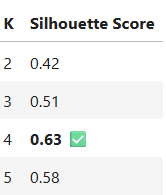

Question 3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?

Answer:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points based on data density, making it excellent for detecting arbitrary-shaped clusters and outliers.

The algorithm mainly depends on two core parameters (and one derived concept).

eps (ε – Epsilon) What it is

The maximum distance between two points to be considered neighbors.

Influence

Small ε - Very few neighbors, Many points labeled as noise, Clusters may break apart

Large ε - More neighbors, Clusters may merge, Risk of losing cluster boundaries

min_samples What it is

Minimum number of points required within ε-neighborhood to form a dense region (core point).

Influence

Low min_samples

More clusters

Sensitive to noise

High min_samples

Fewer, denser clusters

More points classified as noise

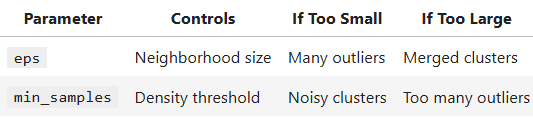

Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

Answer:

Feature scaling is critical for distance-based clustering algorithms because these methods rely heavily on distance calculations (usually Euclidean distance).

Impact on K-Means

Why scaling matters- K-Means minimizes sum of squared distances to centroids, Centroids shift toward high-magnitude features.

Without scaling- Clusters biased toward large-scale features, Misleading centroids.

With scaling- Each feature contributes equally, Meaningful, balanced clusters,

StandardScaler is commonly used for K-Means.

Feature scaling is important because clustering algorithms like K-Means and DBSCAN rely on distance calculations; without scaling, features with larger ranges dominate the distance metric, leading to incorrect and misleading clusters.


Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

Answer:

The Elbow Method is a heuristic technique used to determine the optimal number of clusters (K) in K-Means by analyzing how cluster compactness changes as K increases.

K-Means tries to minimize within-cluster variance.

This is measured using WCSS (Within-Cluster Sum of Squares), also called inertia

As K increases, WCSS always decreases.

The goal is to find a point where adding more clusters gives diminishing returns

Determines - Prevents underfitting (too few clusters), Prevents overfitting (too many clusters)

Balances: Model complexity, Cluster quality.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.
(Include your Python code and output in the code box below.)

Answer:


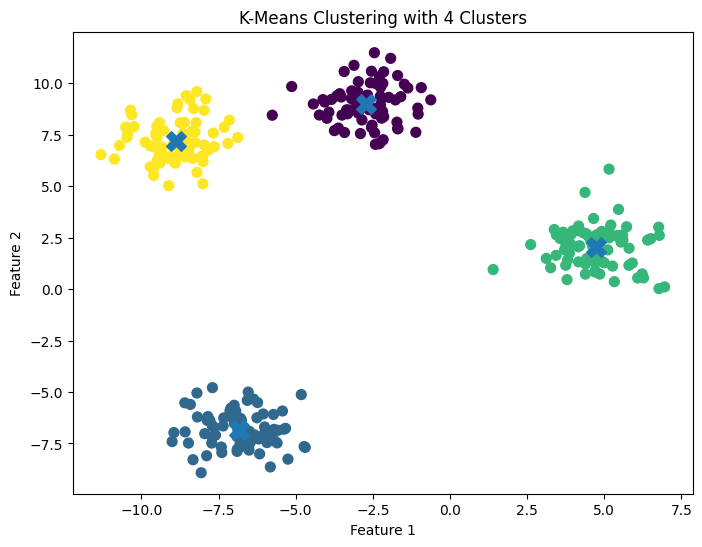

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Get cluster centers
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
# Plot cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=200,
    marker='X'
)

plt.title("K-Means Clustering with 4 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
(Include your Python code and output in the code box below.)

Answer:


In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Count number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)

Number of clusters found (excluding noise): 0


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.
(Include your Python code and output in the code box below.)

Answer:

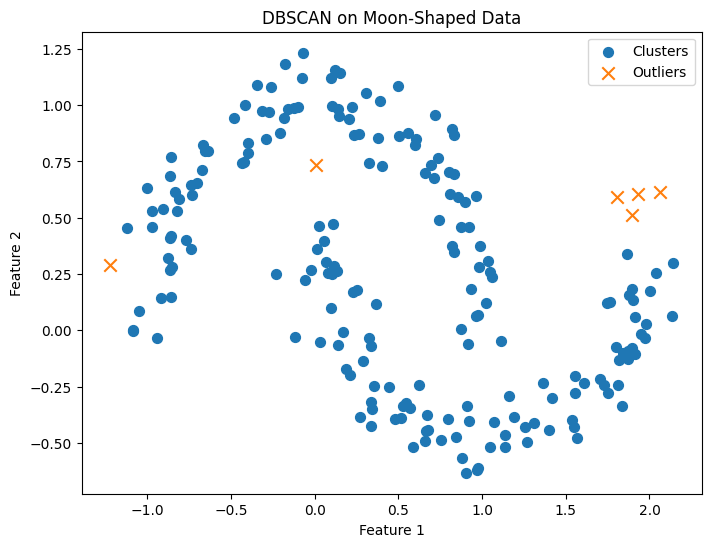

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Identify outliers
outliers = labels == -1
clusters = labels != -1

# Plot clusters and outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[clusters, 0], X[clusters, 1], s=50, label="Clusters")
plt.scatter(X[outliers, 0], X[outliers, 1], s=80, marker='x', label="Outliers")
plt.title("DBSCAN on Moon-Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.
(Include your Python code and output in the code box below.)
Answer:


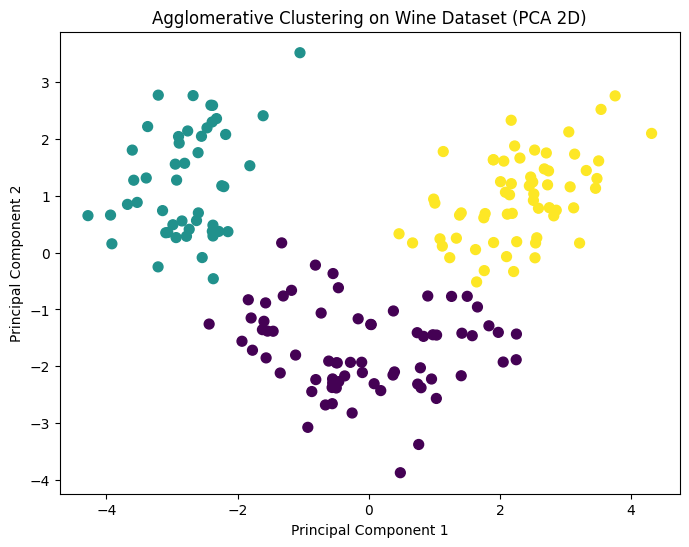

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_pca)

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
(Include your Python code and output in the code box below.)

Answer:

Algorithm: Use K-Means for scalable, interpretable customer segmentation; optionally use Hierarchical Clustering for exploration and DBSCAN to detect outliers.

Preprocessing: Handle missing values (median for numerical, mode/“unknown” for categorical), engineer behavioral features (spend, frequency, recency), encode categoricals, and apply feature scaling.

Number of Clusters: Determine optimal K using the Elbow Method, Silhouette Score, and business interpretability.

Business Value: Enables targeted promotions, personalized campaigns, higher conversion rates, reduced marketing spend, and improved customer lifetime value.
